# Regressions

## Setup

In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import requests
import bokeh.plotting as bk
from bokeh.models import HoverTool, Label, BoxZoomTool, PanTool, ZoomInTool, ZoomOutTool, ResetTool
from pandas.plotting._converter import DatetimeConverter

company_symbol = 'AAPL'

## Request To API

In [2]:
res = requests.get(f'https://api.iextrading.com/1.0/stock/{company_symbol}/chart/5y')
data = res.json()
df = pd.DataFrame(data)
df.head(5)


,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,-0.827309,0.000000,-1.146,71.3844,2013-12-19,72.1107,"Dec 19, 13",71.2887,72.0452,11462767,80239369,71.6091
1,0.597864,0.008374,0.838,71.9822,2013-12-20,72.3218,"Dec 20, 13",71.4313,71.5116,15586205,109103435,71.9809
2,2.762500,0.047073,3.838,74.7447,2013-12-23,74.8273,"Dec 23, 13",73.7837,74.4707,17903833,125326831,74.4027
3,-0.317288,0.042630,-0.424,74.4275,2013-12-24,74.9794,"Dec 24, 13",74.2124,74.7185,5984105,41888735,74.5717
4,-0.494284,0.035705,-0.664,73.9332,2013-12-26,74.6674,"Dec 26, 13",73.8645,74.4838,7286005,51002035,74.1287


## Describe DataFrame

In [3]:
df.describe()

,change,changeOverTime,changePercent,close,high,low,open,unadjustedVolume,volume,vwap
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03,1258.000000
mean,0.074609,0.767967,0.077395,126.205267,127.260977,125.101040,126.186758,3.695206e+07,4.306254e+07,126.232335
std,2.011206,0.550710,1.494487,39.312111,39.677456,38.948316,39.320805,2.051902e+07,2.379830e+07,39.298271
min,-14.688700,-0.082060,-7.993000,65.526600,65.755800,64.709600,64.923300,5.704942e+06,1.147592e+07,57.582200
25%,-0.714904,0.350009,-0.613500,96.369550,97.058000,95.537500,95.987300,2.357676e+07,2.660238e+07,96.338500
50%,0.067517,0.584753,0.061500,113.126650,113.812200,112.398600,113.106150,3.311536e+07,3.703142e+07,113.176550
75%,1.014775,1.170042,0.849250,154.907125,156.776725,153.655500,155.269725,4.645314e+07,5.246383e+07,155.682850
max,11.132000,2.239687,8.198000,231.263100,232.658200,228.981100,229.977600,1.898463e+08,2.668336e+08,231.426900


## Info of DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null object
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 118.0+ KB


## Datetime of DataFrame

In [5]:
df['date_pd'] = pd.to_datetime(df.date)

In [6]:
df.head(3)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,date_pd
0,-0.827309,0.000000,-1.146,71.3844,2013-12-19,72.1107,"Dec 19, 13",71.2887,72.0452,11462767,80239369,71.6091,2013-12-19
1,0.597864,0.008374,0.838,71.9822,2013-12-20,72.3218,"Dec 20, 13",71.4313,71.5116,15586205,109103435,71.9809,2013-12-20
2,2.762500,0.047073,3.838,74.7447,2013-12-23,74.8273,"Dec 23, 13",73.7837,74.4707,17903833,125326831,74.4027,2013-12-23


In [7]:
df['year'] = df.date_pd.dt.year
df.head(3)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,date_pd,year
0,-0.827309,0.000000,-1.146,71.3844,2013-12-19,72.1107,"Dec 19, 13",71.2887,72.0452,11462767,80239369,71.6091,2013-12-19,2013
1,0.597864,0.008374,0.838,71.9822,2013-12-20,72.3218,"Dec 20, 13",71.4313,71.5116,15586205,109103435,71.9809,2013-12-20,2013
2,2.762500,0.047073,3.838,74.7447,2013-12-23,74.8273,"Dec 23, 13",73.7837,74.4707,17903833,125326831,74.4027,2013-12-23,2013


## Regression Model

In [8]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [6, 4]

## Split Data Into Train & Test Data

In [9]:
# TO PASS IN DATA
X_full, Y_full = df.date_pd, df.close

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.5, random_state=10)

Text(0.5, 1.0, 'Actual Stock Price')

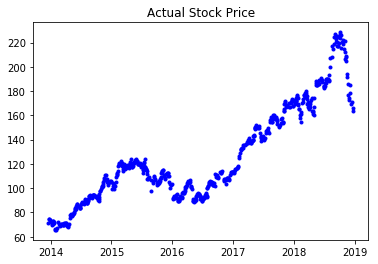

In [11]:
plt.plot(X_train, Y_train, 'bo', markersize=3)
plt.title('Actual Stock Price')

Text(0.5, 1.0, 'Test Set')

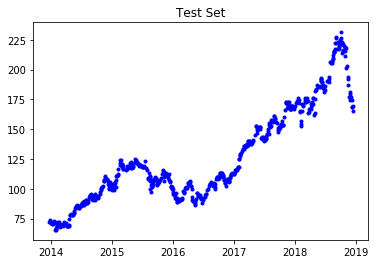

In [12]:
plt.plot(X_test, Y_test, 'bo', markersize=3)
plt.title('Test Set')

## Fit Training Data Into Regression

In [13]:
X_full_numpy = matplotlib.dates.date2num(X_full)
# X_full_numpy = [matplotlib.dates.date2num(x) for x in X_full]


Y_full_numpy = Y_full
X_train_numpy, X_test_numpy, Y_train_numpy, Y_test_numpy = train_test_split(X_full_numpy, Y_full_numpy, test_size=0.5, random_state=10)


In [14]:
# result = X_full_numpy.sort()
# type(X_full_numpy)

In [15]:
coefs_lin = poly.polyfit(X_train_numpy, Y_train_numpy, 1)
coefs_sq = poly.polyfit(X_train_numpy, Y_train_numpy, 2)
coefs_ten = poly.polyfit(X_train_numpy, Y_train_numpy, 11)


/Users/joyceliao/.local/share/virtualenvs/data_analysis-2Dzdq7Jq/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: The fit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# fix X_line - pass in actual X numbers
X_line = np.linspace(0, 500, 5000)
ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

array([-48478.13635813, -48478.12975418, -48478.12315023, ...,
       -48445.1364157 , -48445.12981175, -48445.1232078 ])

Text(0.5, 1.0, '5-Year Stock Trend')

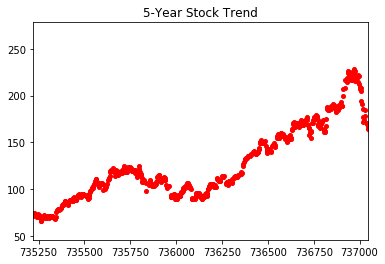

In [17]:
# plt.ylim?
plt.ylim(min(Y_train_numpy - 20), max(Y_train_numpy + 50))
plt.xlim(min(X_train_numpy), max(X_train_numpy))
plt.plot(X_line, ffit_ln, 'g')
plt.plot(X_line, ffit_sq, 'b')
plt.plot(X_line, ffit_ten, 'r')

# X_month = matplotlib.dates.MonthLocator()

plt.plot(X_train_numpy, Y_train_numpy, 'ro', markersize=4)
plt.title('5-Year Stock Trend')

## Conclusion (1): 

In [18]:
print(f'The price of stock came in a wave form, but generally follows an upward direction over the years.')

The price of stock came in a wave form, but generally follows an upward direction over the years.


## Conclusion (2):

In [19]:
highest = df.sort_values(by=['close']).tail(1)
highest

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,date_pd,year
1205,2.7803,2.239687,1.217,231.2631,2018-10-03,232.6582,"Oct 3, 18",228.9811,229.2501,28654799,28654799,231.4269,2018-10-03,2018


In [20]:
print(f'The highest point of the stock price during the 5 years was $231.')

The highest point of the stock price during the 5 years was $231.


## Conclusion (3): 

In [21]:
lowest = df.sort_values(by=['close']).head(1)
lowest

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,date_pd,year
27,-0.126916,-0.08206,-0.193,65.5266,2014-01-30,66.4074,"Jan 30, 14",65.1226,65.8882,24251827,169762789,71.9614,2014-01-30,2014


In [22]:
print(f'The lowest point of the stock price during the 5 years was $66.')

The lowest point of the stock price during the 5 years was $66.
